In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
P1 = [0.1, 0.6]
P2 = [0.15, 0.71]
P3 = [0.08, 0.9]
P4 = [0.16, 0.85]
P5 = [0.2, 0.3]
P6 = [0.25, 0.5]
P7 = [0.24, 0.1]
P8 = [0.3, 0.2]

points = [P1, P2, P3, P4, P5, P6, P7, P8]

Centroids are :
  [[0.148      0.712     ]
 [0.24666667 0.2       ]]
Labels :  [0 0 0 0 1 0 1 1]


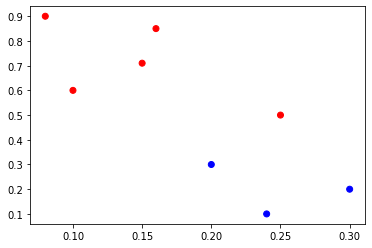

In [13]:
# using sklearn

from sklearn.cluster import KMeans

X = np.array(points)

initial_centroids = [P1, P8]

kmeans = KMeans(init=np.array(initial_centroids), n_clusters = 2)

# kmeans = KMeans(init="k-means++", n_clusters = 2)

kmeans.fit(X)

pred = kmeans.predict(X)

print("Centroids are :\n ", kmeans.cluster_centers_)
print("Labels : ", kmeans.labels_)

colors = list(map(lambda x: 'blue' if x==1 else 'red', pred))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o")
plt.show()

In [28]:
# Implementing k-means from scratch

import math

def dist(A, B):
    S = 0
    
    for i in range(len(A)):
        S += ((A[i] - B[i]) ** 2)
        
    return math.sqrt(S)


def cluster(C1, C2):
    c1 = C1
    c2 = C2
    
    cluster1 = list()
    cluster2 = list()
    
    for p in points:
        d1 = dist(p, C1)
        d2 = dist(p, C2)
        
        if(d1<d2):
            cluster1.append(p)
        else:
            cluster2.append(p)
            
    x1 = 0
    y1 = 0
    
    for i in cluster1:
        x1 = x1 + i[0]
        y1 = y1 + i[1]
        
    x1 = x1/len(cluster1)
    y1 = y1/len(cluster1)
    
    centroid1 = [x1, y1]
    
    
    x2 = 0
    y2 = 0
    
    for i in cluster2:
        x2 = x2 + i[0]
        y2 = y2 + i[1]
        
    x2 = x2/len(cluster2)
    y2 = y2/len(cluster2)
    
    centroid2 = [x2, y2]
    
    
    C1 = centroid1
    C2 = centroid2
    
    if centroid1[0]==c1[0] and centroid1[1]==c1[1] and centroid2[0]==c2[0] and centroid2[1]==c2[1]:
        
        
        print("Clusters are:")
        print("Cluster 1: ", cluster1)
        print("Cluster 2: ", cluster2)
        
        if P6 in cluster1:
            print("Point P6 belongs to cluster 1")
        else:
            print("Point P6 belongs to cluster 2")
            
        
        print("The population of cluster around m2 : ", len(cluster2))
        
        print("Updated value of m1 and m2")
        print("m1/c1 : ", C1)
        print("m2/c2 : ", C2)
        
        C = [C1, C2]
        C_arr = np.array(C)
        
        P = list()
        
        for i in points:
            if i in cluster1:
                P.append(0)
            else:
                P.append(1)
                
        X = np.array(points)
        
        colors = list(map(lambda x: 'blue' if x==1 else 'red', P))
        plt.scatter(X[:,0], X[:,1], c=colors, marker="o")
        plt.scatter(C_arr[:,0], C_arr[:,1], c='g', marker="x")
        plt.show()
        
        
    else:
        cluster(C1, C2)
    
    
    

Initial Data Points and their centroids : 
Points :  [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]


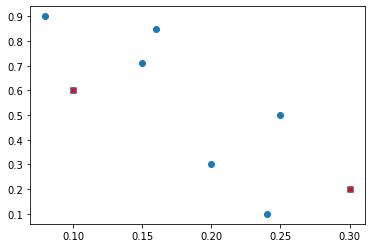

Clusters are:
Cluster 1:  [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.25, 0.5]]
Cluster 2:  [[0.2, 0.3], [0.24, 0.1], [0.3, 0.2]]
Point P6 belongs to cluster 1
The population of cluster around m2 :  3
Updated value of m1 and m2
m1/c1 :  [0.148, 0.712]
m2/c2 :  [0.24666666666666667, 0.20000000000000004]


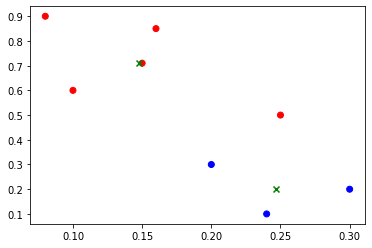

In [29]:
print("Initial Data Points and their centroids : ")
print("Points : ", points)

C1 = P1
C2 = P8

C = [C1, C2]
C_arr = np.array(C)

plt.scatter(X[:,0], X[:,1], marker="o")
plt.scatter(C_arr[:,0], C_arr[:,1], c='r', marker="x")
plt.show()

cluster(C1, C2)